Testing column: VehicleType


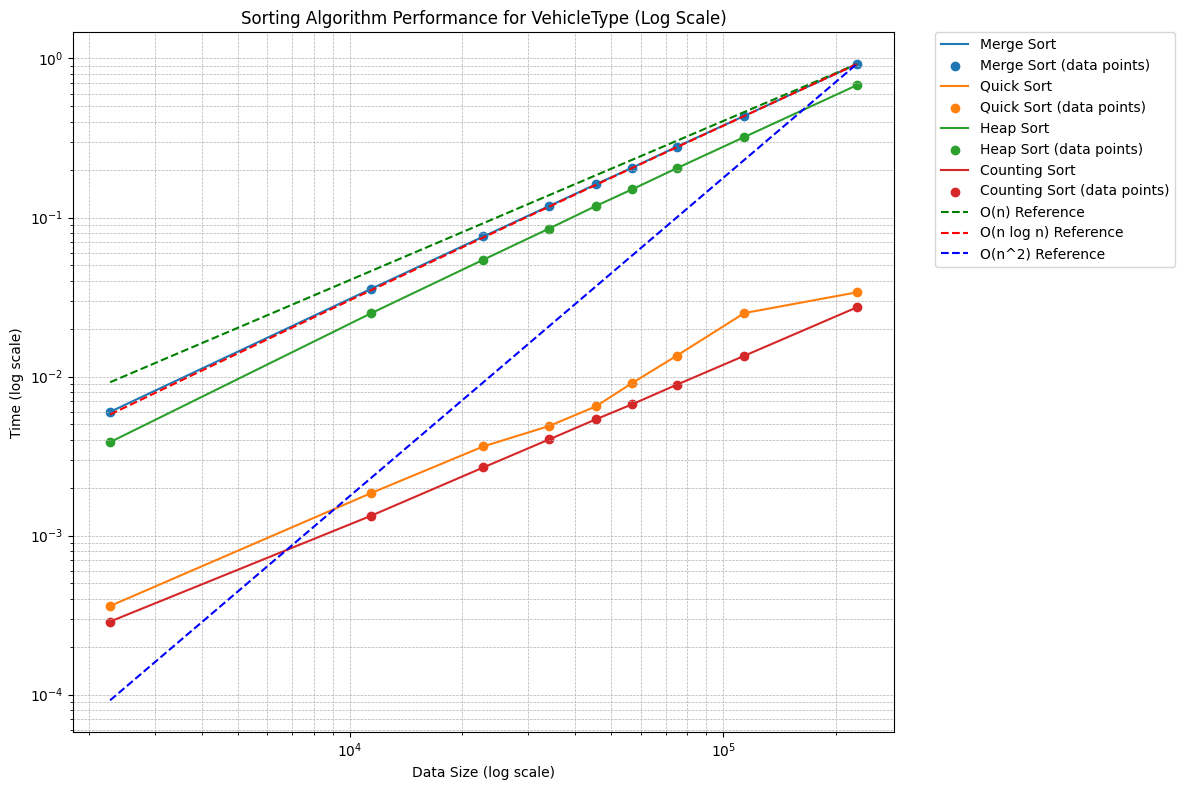

Testing column: DirectionTime


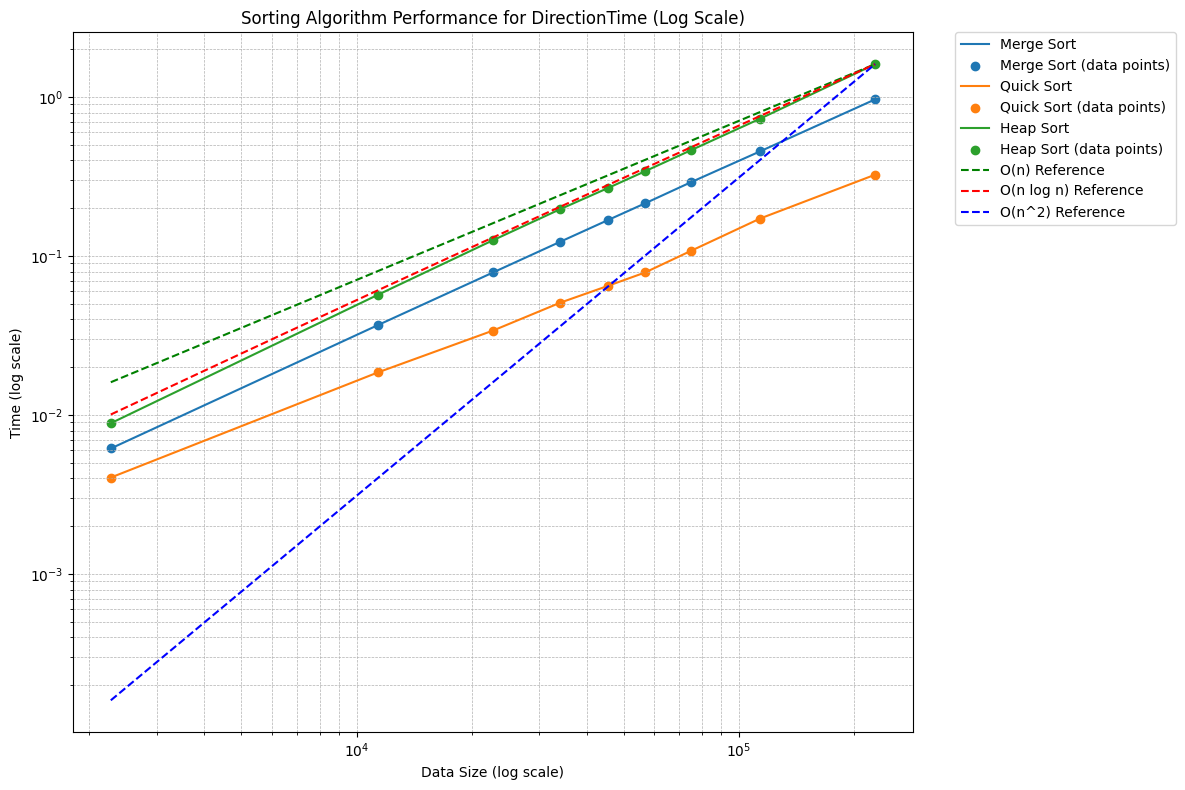

Testing column: GantryID


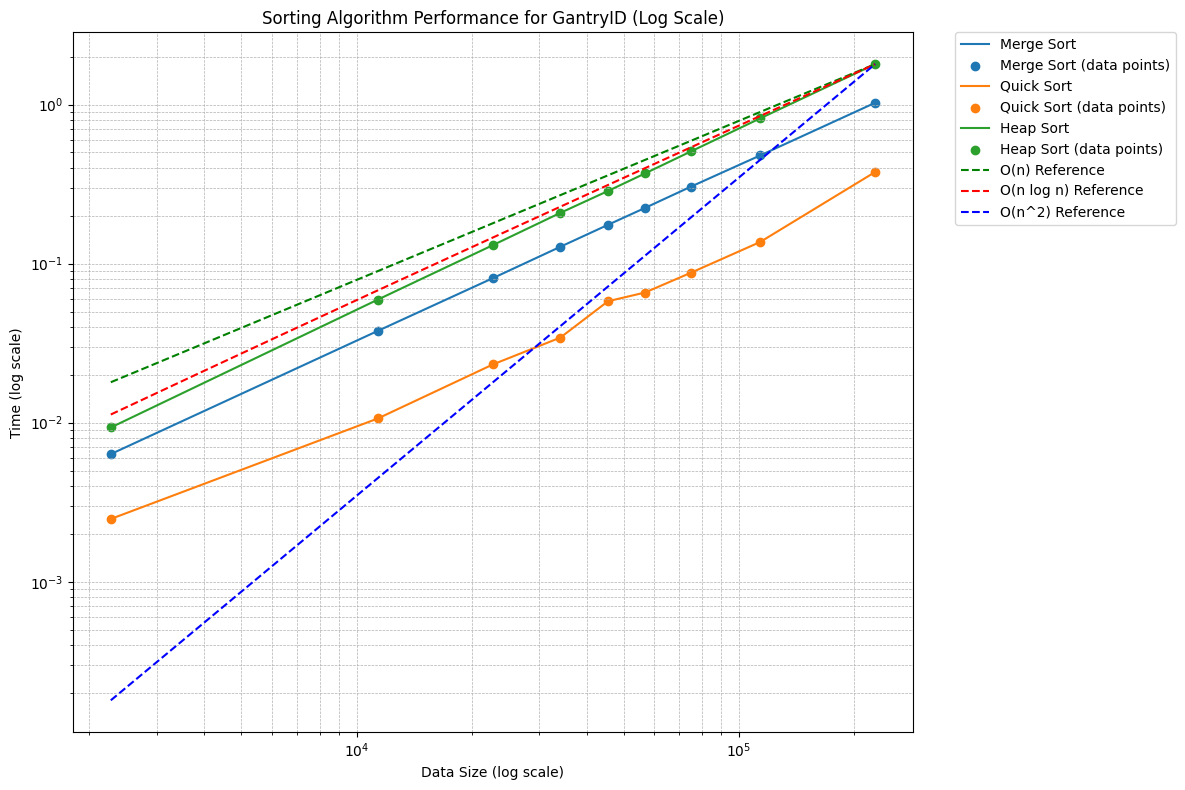

Testing column: TripLength


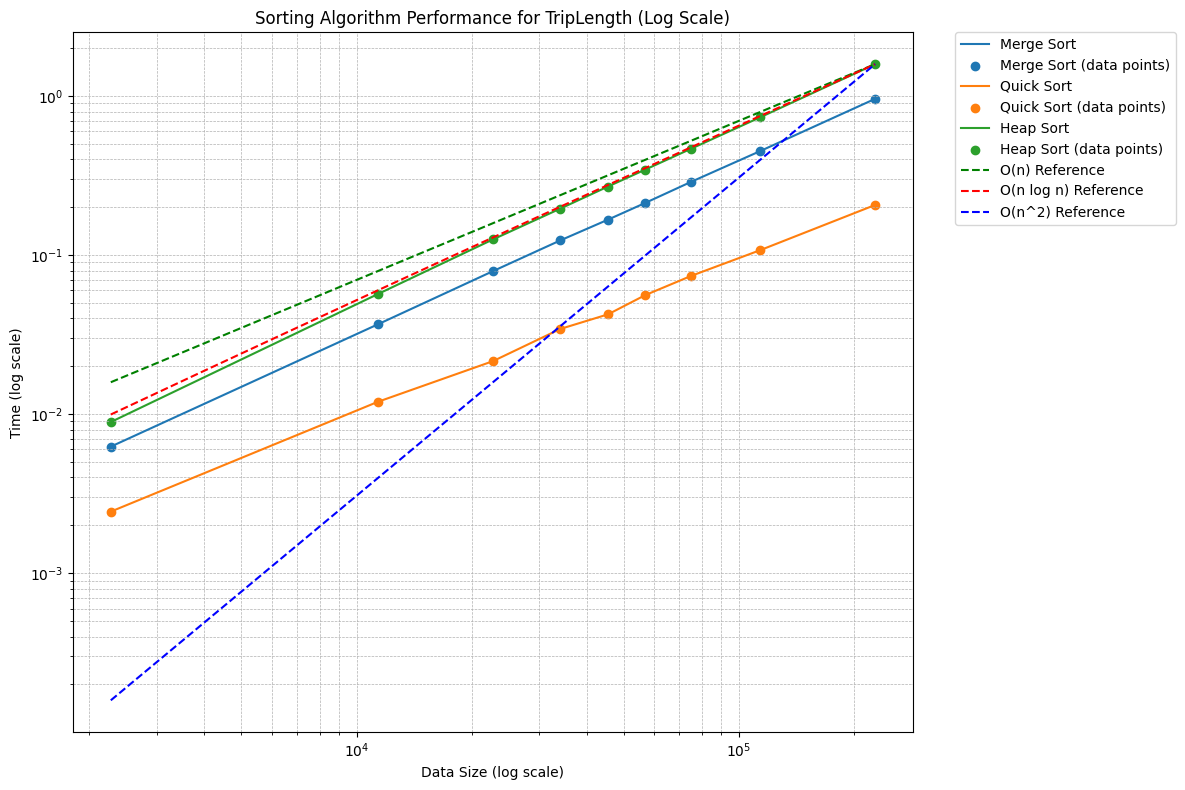


Sorting Performance Summary:
           Column      Algorithm  Average Time (s)
0     VehicleType     Merge Sort          0.248701
1     VehicleType     Quick Sort          0.010972
2     VehicleType      Heap Sort          0.182241
3     VehicleType  Counting Sort          0.007777
4   DirectionTime     Merge Sort          0.260460
5   DirectionTime     Quick Sort          0.095239
6   DirectionTime      Heap Sort          0.422937
7        GantryID     Merge Sort          0.273837
8        GantryID     Quick Sort          0.088459
9        GantryID      Heap Sort          0.465435
10     TripLength     Merge Sort          0.258769
11     TripLength     Quick Sort          0.061931
12     TripLength      Heap Sort          0.421734


In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime
import numpy as np

# 排序算法实现
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

def counting_sort(arr):
    if not arr:
        return arr  # 空数组直接返回

    # 找到最大值和最小值
    max_val = max(arr)
    min_val = min(arr)
    range_val = max_val - min_val + 1  # 值域范围

    # 创建计数数组
    count = [0] * range_val

    # 填充计数数组
    for num in arr:
        count[num - min_val] += 1

    # 构建排序后的数组
    sorted_arr = []
    for i, c in enumerate(count):
        sorted_arr.extend([i + min_val] * c)
    
    return sorted_arr

# 测试排序算法性能
def test_sorting_algorithm(data, algorithms):
    results = {}
    data_sizes = [int(len(data) * frac) for frac in [1.0, 0.5, 0.33, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]]

    for algorithm_name, algorithm in algorithms.items():
        times = []
        for size in data_sizes:
            subset = data[:size]
            start_time = time.time()
            algorithm(subset.copy())
            end_time = time.time()
            times.append(end_time - start_time)
        results[algorithm_name] = times
    return results, data_sizes

# 绘制单列结果及时间复杂度参考线（对数尺度）
def plot_results(results, data_sizes, column_label):
    plt.figure(figsize=(12, 8))

    # 绘制实际运行时间和数据点
    for algorithm_name, times in results.items():
        plt.plot(data_sizes, times, label=algorithm_name)  # 连续曲线
        plt.scatter(data_sizes, times, label=f"{algorithm_name} (data points)")  # 数据点

    # 数据规模调整为对数间隔
    min_size, max_size = min(data_sizes), max(data_sizes)
    sizes = np.logspace(np.log10(min_size), np.log10(max_size), num=10, base=10, dtype=int)

    # 时间复杂度曲线
    o_n = sizes
    o_nlogn = [x * np.log2(x) for x in sizes]
    o_n2 = [x**2 for x in sizes]

    # 确保参考线归一化到所有算法的最大运行时间
    max_time = max(max(times) for times in results.values())
    o_n_normalized = [y / o_n[-1] * max_time for y in o_n]
    o_nlogn_normalized = [y / o_nlogn[-1] * max_time for y in o_nlogn]
    o_n2_normalized = [y / o_n2[-1] * max_time for y in o_n2]

    # 绘制参考线
    plt.plot(sizes, o_n_normalized, label="O(n) Reference", linestyle='dashed', color='green')
    plt.plot(sizes, o_nlogn_normalized, label="O(n log n) Reference", linestyle='dashed', color='red')
    plt.plot(sizes, o_n2_normalized, label="O(n^2) Reference", linestyle='dashed', color='blue')

    # 设置对数刻度
    plt.xscale('log')
    plt.yscale('log')

    # 设置范围和样式
    plt.xlabel('Data Size (log scale)')
    plt.ylabel('Time (log scale)')
    plt.title(f'Sorting Algorithm Performance for {column_label} (Log Scale)')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.grid(which="both", linestyle='--', linewidth=0.5)
    plt.show()

def read_csv(file_path):
    data = []
    with open(file_path, mode='r', encoding='utf-8-sig') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    return data

# 主函数
def main():
    file_path = "TDCS_M06A_20231204_080000.csv"
    raw_data = read_csv(file_path)
    
    # 提取各列数据
    vehicle_type = [int(row[0]) for row in raw_data if row[0].isdigit()]  # 确保整数
    direction_time_o = [datetime.strptime(row[1], "%Y-%m-%d %H:%M:%S") for row in raw_data]
    gantry_id_o = [row[2] for row in raw_data]  # 保持为字符串
    trip_length = [float(row[5]) for row in raw_data]

    # 定义可选排序算法
    algorithms = {
        "Merge Sort": merge_sort,
        "Quick Sort": quick_sort,
        "Heap Sort": heap_sort,
        "Counting Sort": counting_sort,  # 添加 Counting Sort
    }

    # 测试每列的排序算法
    column_data = {
        "VehicleType": vehicle_type,
        "DirectionTime": direction_time_o,
        "GantryID": gantry_id_o,
        "TripLength": trip_length,
    }

    all_results = []

    for column_label, data in column_data.items():
        print(f"Testing column: {column_label}")
        
        # 判断是否使用 Counting Sort
        if column_label == "VehicleType":
            data = [int(x) for x in data]  # 确保数据是整数
            valid_algorithms = algorithms  # 使用所有算法
        else:
            valid_algorithms = {k: v for k, v in algorithms.items() if k != "Counting Sort"}  # 排除 Counting Sort
        
        results, data_sizes = test_sorting_algorithm(data, valid_algorithms)
        all_results.append((column_label, results, data_sizes))
        plot_results(results, data_sizes, column_label)
    
    # 输出对比表格
    result_table = []
    for column_label, results, data_sizes in all_results:
        for algorithm_name, times in results.items():
            avg_time = sum(times) / len(times)
            result_table.append({"Column": column_label, "Algorithm": algorithm_name, "Average Time (s)": avg_time})
    
    result_df = pd.DataFrame(result_table)
    print("\nSorting Performance Summary:")
    print(result_df)
    result_df.to_csv("sorting_performance_summary_optimized.csv", index=False)

# 运行主程序
if __name__ == "__main__":
    main()